In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
import cv2
import os

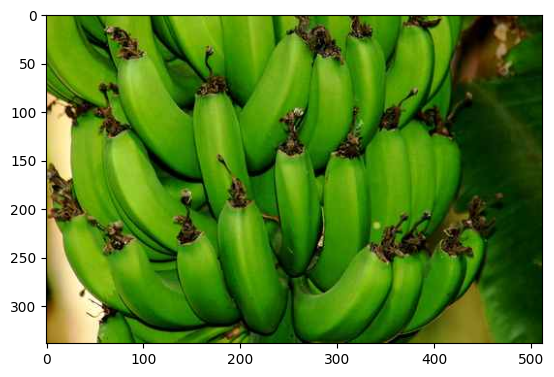

In [2]:
img = image.load_img("./data/data/test/banana/116616405_74690ba0a0_b.jpg")
plt.imshow(img)

In [4]:
cv2.imread("./data/data/test/banana/116616405_74690ba0a0_b.jpg").shape

(339, 512, 3)

In [20]:
path_treino = "./data/data/train/"
path_test = "./data/data/test/"

In [21]:
# Pré-processamento dos dados
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
        path_treino,
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical')

validation_dataset = test_datagen.flow_from_directory(
        path_test,
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical')

Found 3058 images belonging to 8 classes.
Found 772 images belonging to 8 classes.


In [22]:
train_dataset.class_indices

{'banana': 0,
 'blackberry': 1,
 'bread': 2,
 'carrot': 3,
 'lime': 4,
 'pineapple': 5,
 'pumpkin': 6,
 'tomato': 7}

In [23]:
############### LENDO INDI


import json

# Lendo o arquivo JSON
with open('./model/dataset_indices.json', 'r') as file:
    json_data = json.load(file)

# Salvando os dados em um dicionário
dicionario = dict(json_data)

# Exemplo de acesso aos dados do dicionário
dicionario

{'banana': 0,
 'blackberry': 1,
 'bread': 2,
 'carrot': 3,
 'lime': 4,
 'pineapple': 5,
 'pumpkin': 6,
 'tomato': 7}

In [48]:
model = load_model("./model/modelo_treinado_teste.h5")

d:\AREA_DE_TRABALHO\Faculdade_6_Periodo\TIAW6\dishcover-oficial\dishcover\ia./validation_oficial/


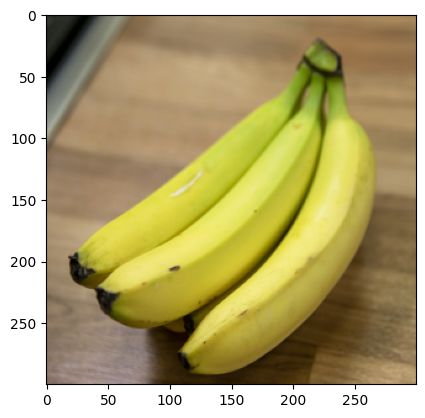

1/1 [==============================] - 0s 73ms/step
[1. 0. 0. 0. 0. 0. 0. 0.]
banana


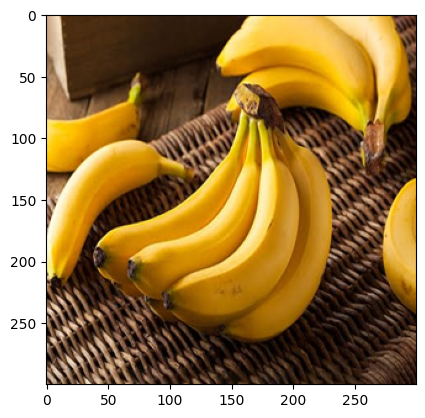

1/1 [==============================] - 0s 86ms/step
[1.4374607e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.0000000e+00 0.0000000e+00]
pumpkin


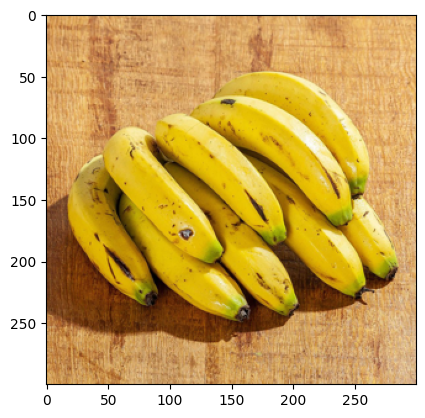

1/1 [==============================] - 0s 52ms/step
[1. 0. 0. 0. 0. 0. 0. 0.]
banana


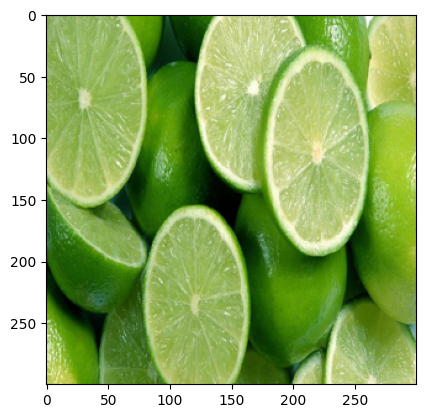

1/1 [==============================] - 0s 54ms/step
[0. 0. 0. 0. 1. 0. 0. 0.]
lime


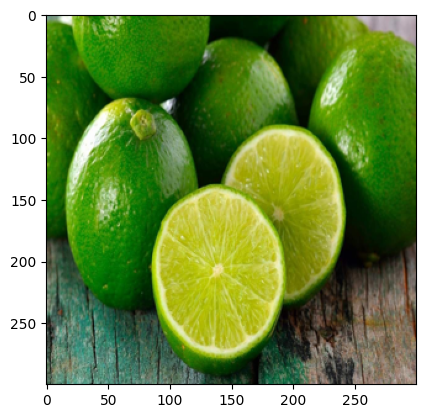

1/1 [==============================] - 0s 77ms/step
[0. 0. 0. 0. 1. 0. 0. 0.]
lime


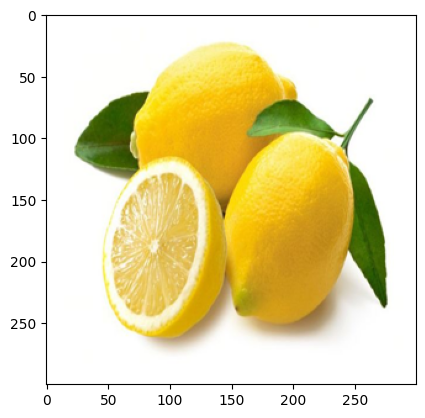

1/1 [==============================] - 0s 53ms/step
[1. 0. 0. 0. 0. 0. 0. 0.]
banana


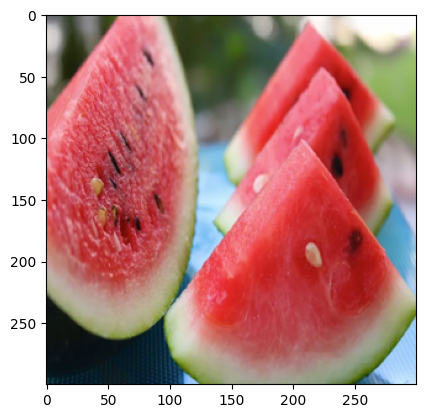

1/1 [==============================] - 0s 45ms/step
[0. 0. 0. 0. 0. 0. 0. 1.]
tomato


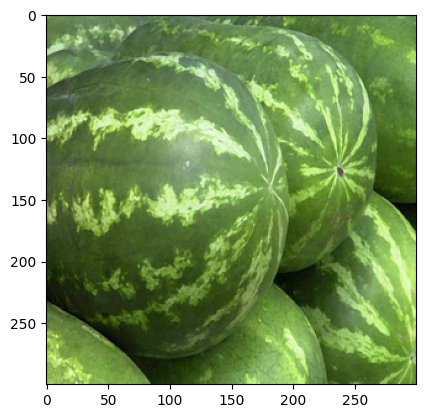

1/1 [==============================] - 0s 39ms/step
[0. 0. 0. 0. 1. 0. 0. 0.]
lime


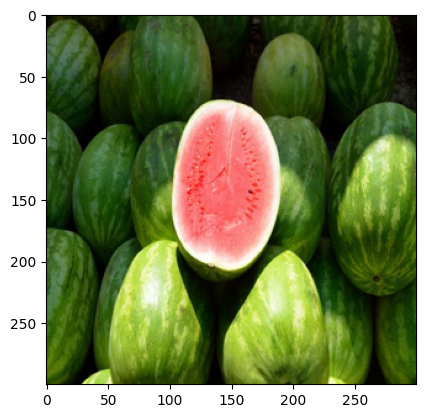

1/1 [==============================] - 0s 47ms/step
[0. 1. 0. 0. 0. 0. 0. 0.]
blackberry


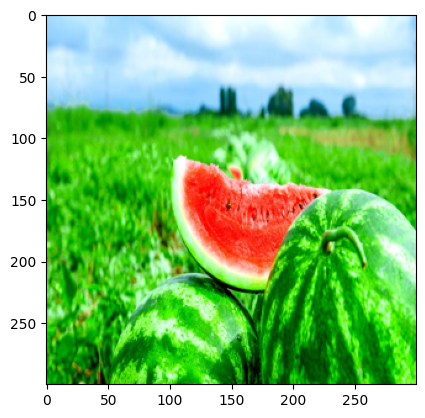

1/1 [==============================] - 0s 41ms/step
[0. 0. 0. 0. 0. 0. 0. 1.]
tomato


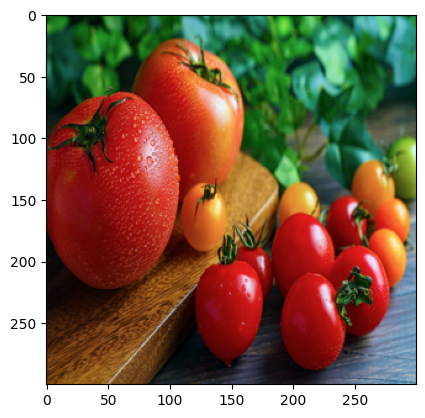

1/1 [==============================] - 0s 53ms/step
[0. 0. 0. 0. 0. 0. 0. 1.]
tomato


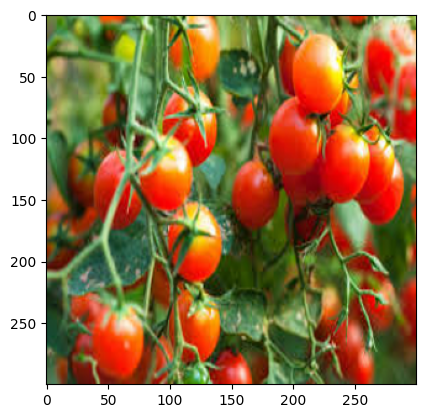

1/1 [==============================] - 0s 90ms/step
[0.000000e+00 0.000000e+00 0.000000e+00 3.473182e-23 0.000000e+00
 0.000000e+00 0.000000e+00 1.000000e+00]
tomato


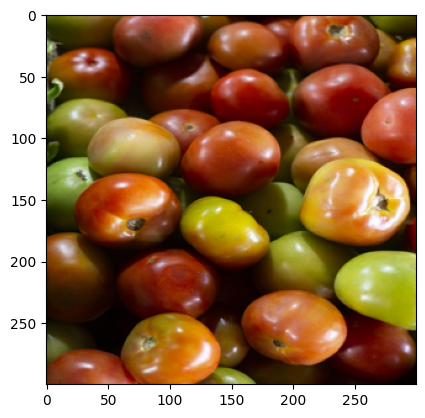

1/1 [==============================] - 0s 60ms/step
[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
 0.0000000e+00 2.0579483e-09 1.5856920e-16]
carrot


In [50]:
from PIL import Image

dire = os.getcwd()

diretorio = dire + "./validation_oficial/"
# diretorio = dire + "/data/data/validation/"

print(diretorio)

for filename in os.listdir(diretorio):
  

      if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):

        img_path = os.path.join(diretorio, filename)
      
        img = Image.open(img_path)
        # imagem_redimensionada = img.resize((100,100))
        # imagem_redimensionada.save(img_path)        
        
        # img = image.load_img(img_path)
        img = img.resize((300,300))
        plt.imshow(img)
        plt.show()
        
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        value = model.predict(images)
        print(value[0])
        value = value[0].tolist()
        
        value_list_int = list(map(int, value))         
        
        maxValue = max(value_list_int)        
        valu_posi = value_list_int.index(maxValue)
        
        
        dictClassifier = dicionario
        
        for i,each in enumerate(dictClassifier):
          
          if(valu_posi == i):
            print(each)